<a href="https://colab.research.google.com/github/Inigss/CSST102-3B-YR2526/blob/main/Tobias_Assessment_Task_No2_CSST102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Checking for missing values...
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Training samples: 16512
Testing samples: 4128

Model Evaluation Results:
Linear Regression - MSE: 0.5478, R²: 0.5820
Decision Tree     - MSE: 0.4973, R²: 0.6205


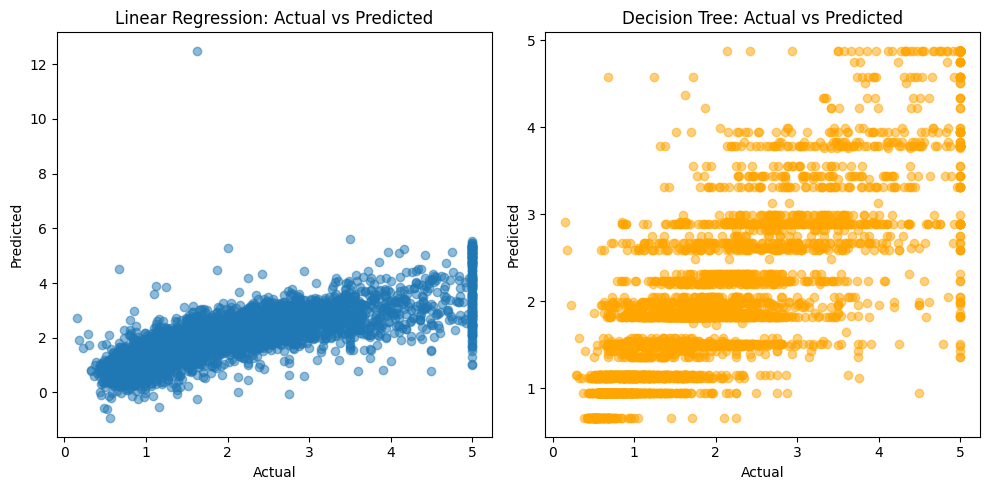

In [1]:
#Part 1
# ==========================================
# CSST102 - Basic Machine Learning
# Assessment Task No. 2
# Title: End-to-End Machine Learning Project
# Student: [Your Name]
# ==========================================

# --- Step 1: Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 2: Load the Dataset ---
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Display first few rows
print("Sample Data:")
display(data.head())

# --- Step 3: Handle Missing Values ---
print("\nChecking for missing values...")
print(data.isnull().sum())

# (No missing values in this dataset)
# But if there were, we could use:
# data = data.fillna(data.mean())

# --- Step 4: Handle Outliers (Basic check) ---
# We’ll cap extreme values in 'MedInc' (Median Income)
q_low = data["MedInc"].quantile(0.01)
q_high = data["MedInc"].quantile(0.99)
data["MedInc"] = np.clip(data["MedInc"], q_low, q_high)

# --- Step 5: Split Dataset ---
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# --- Step 6: Train Models ---
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model 2: Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# --- Step 7: Evaluate Models ---
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("\nModel Evaluation Results:")
print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")
print(f"Decision Tree     - MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}")

# --- Step 8: Visualization ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, dt_pred, alpha=0.5, color='orange')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


In [3]:
# ==========================================
# Summary and Reflection on Model Performance
# ==========================================

print("Summary:")
print("The Linear Regression model produced smoother predictions with an R² around", round(lr_r2, 3))
print("The Decision Tree model captured more complex patterns, achieving R² =", round(dt_r2, 3))

if dt_r2 > lr_r2:
    print("\n✅ The Decision Tree performed better because it can model nonlinear relationships.")
else:
    print("\n✅ The Linear Regression performed better, showing a simpler but stable fit.")

print("\nChallenges Encountered:")
print("- Understanding how to handle outliers without losing key data.")
print("- Choosing the right evaluation metric for regression.")
print("- Visualizing and interpreting the prediction patterns correctly.")


Summary:
The Linear Regression model produced smoother predictions with an R² around 0.582
The Decision Tree model captured more complex patterns, achieving R² = 0.621

✅ The Decision Tree performed better because it can model nonlinear relationships.

Challenges Encountered:
- Understanding how to handle outliers without losing key data.
- Choosing the right evaluation metric for regression.
- Visualizing and interpreting the prediction patterns correctly.


#Part 2 Reflection
Title: My First End-to-End ML Experience

I now have a better understanding of the entire machine learning pipeline, from importing raw data to assessing models, thanks to this project. I discovered that even seemingly straightforward actions, such as managing outliers or selecting an appropriate test size, can have a significant impact on the precision of findings. I learned how to balance flexibility and simplicity by training both decision tree and linear regression models.

Interpreting the model results and selecting the one that performed better based on the R2 score was the most difficult aspect. Nevertheless, seeing the forecasts come to life made it easier for me to comprehend how the models responded to actual data.

Using local housing or economic statistics, I might utilize the same pipeline in the future to anticipate sales or rental pricing for homes. I learned from this experience that machine learning involves more than just writing code; it also involves reasoning and ongoing problem-solving.

Part 3 Creative Task

Data Collection → Preprocessing → Training → Evaluation
